## 1) Introduction to Pytorch

In [1]:
import torch

In [2]:
zeroes = torch.zeros(5, 3)
print(zeroes)
print(zeroes.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
integer = torch.ones((5, 3), dtype=torch.int16)
print(integer)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [4]:
torch.manual_seed(1450)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2)

torch.manual_seed(1450)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3)

A random tensor:
tensor([[0.4901, 0.7461],
        [0.5170, 0.1560]])

A different random tensor:
tensor([[0.2645, 0.4323],
        [0.5524, 0.8408]])

Should match r1:
tensor([[0.4901, 0.7461],
        [0.5170, 0.1560]])


In [5]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos       
print(threes)              
print(threes.shape)        

r1 = torch.rand(2, 3)
r2 = torch.rand(2, 3)
r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [6]:
ran = torch.rand(2, 2) - 0.5 * 2 
print('A random matrix, random tensor:')
print(ran)


print('\nAbsolute value of random tensor:')
print(torch.abs(ran))

print('\nInverse sine of random tensor:')
print(torch.asin(ran))

print('\nDeterminant of random tensor:')
print(torch.det(ran))
print('\nSingular value decomposition of random tensor:')
print(torch.svd(ran))

print('\nAverage and standard deviation of random tensor:')
print(torch.std_mean(ran))
print('\nMaximum value of random tensor:')
print(torch.max(ran))

A random matrix, random tensor:
tensor([[-0.7140, -0.2433],
        [-0.4865, -0.6793]])

Absolute value of random tensor:
tensor([[0.7140, 0.2433],
        [0.4865, 0.6793]])

Inverse sine of random tensor:
tensor([[-0.7952, -0.2457],
        [-0.5081, -0.7468]])

Determinant of random tensor:
tensor(0.3667)

Singular value decomposition of random tensor:
torch.return_types.svd(
U=tensor([[-0.6614, -0.7500],
        [-0.7500,  0.6614]]),
S=tensor([1.0725, 0.3419]),
V=tensor([[ 0.7806,  0.6251],
        [ 0.6251, -0.7806]]))

Average and standard deviation of random tensor:
(tensor(0.2162), tensor(-0.5308))

Maximum value of random tensor:
tensor(-0.2433)


In [7]:
import torch                 
import torch.nn as nn          
import torch.nn.functional as F

In [8]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] 
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [9]:
net = LeNet()
print(net)                       

input = torch.rand(1, 1, 32, 32) 
print('\nImage batch shape:')
print(input.shape)

output = net(input)             
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0186, -0.0126, -0.0540,  0.0239,  0.0600,  0.0075, -0.0711,  0.0772,
         -0.0221,  0.0361]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [10]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [12]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100.0%


In [13]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

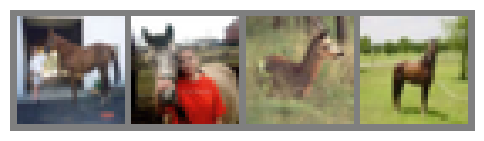

horse horse  deer horse


In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
import matplotlib
import torch.optim as optim

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

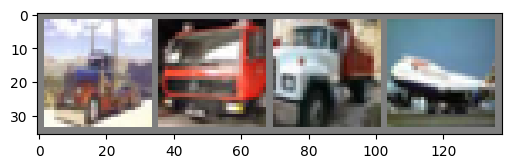

truck truck truck plane


In [17]:
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [20]:
for epoch in range(3): 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1500 == 1499:  
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1500))
            running_loss = 0.0

print('Finished Training')

[1,  1500] loss: 2.247
[1,  3000] loss: 1.987
[1,  4500] loss: 1.782
[1,  6000] loss: 1.659
[1,  7500] loss: 1.568
[1,  9000] loss: 1.521
[1, 10500] loss: 1.452
[1, 12000] loss: 1.427
[2,  1500] loss: 1.380
[2,  3000] loss: 1.350
[2,  4500] loss: 1.349
[2,  6000] loss: 1.344
[2,  7500] loss: 1.324
[2,  9000] loss: 1.307
[2, 10500] loss: 1.284
[2, 12000] loss: 1.249
[3,  1500] loss: 1.195
[3,  3000] loss: 1.213
[3,  4500] loss: 1.217
[3,  6000] loss: 1.186
[3,  7500] loss: 1.205
[3,  9000] loss: 1.189
[3, 10500] loss: 1.201
[3, 12000] loss: 1.190
Finished Training


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


## Introduction to Pytorch Tensors

In [22]:
import torch
import math

In [23]:
x = torch.empty(4, 5)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[3.9301e+25, 1.6577e-42, 3.2734e+00, 7.4387e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [24]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


In [25]:
torch.manual_seed(1729)
rand1 = torch.rand(2, 3)
print(rand1)

rand2 = torch.rand(2, 3)
print(rand2)

torch.manual_seed(1729)
rand3 = torch.rand(2, 3)
print(rand3)

rand4 = torch.rand(2, 3)
print(rand4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


In [26]:
x = torch.empty(2, 3, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 3, 3])
tensor([[[4.7754e+25, 1.6577e-42, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])
torch.Size([2, 3, 3])
tensor([[[3.9292e+25, 1.6577e-42, 3.8325e+00],
         [6.1822e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])
torch.Size([2, 3, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 3, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 3, 3])
tensor([[[0.6128, 0.1519, 0.0453],

In [27]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [28]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[11.2406, 11.2083, 11.6692],
        [18.3283,  0.2118, 18.4972]], dtype=torch.float64)
tensor([[11, 11, 11],
        [18,  0, 18]], dtype=torch.int32)


In [29]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [30]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


In [31]:
a = torch.rand(2, 3)
b = torch.rand(2, 3)

print(a * b)

tensor([[0.1390, 0.2071, 0.4669],
        [0.1071, 0.3477, 0.0344]])


In [32]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.7357, 0.0381, 0.2138, 0.5395],
        [0.3686, 0.4007, 0.7220, 0.8217]])
tensor([[1.4715, 0.0762, 0.4276, 1.0791],
        [0.7371, 0.8014, 1.4439, 1.6434]])


In [33]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2)
print(b)

c = a * torch.rand(   3, 1) 
print(c)

d = a * torch.rand(   1, 2)
print(d)

tensor([[[0.2612, 0.7375],
         [0.8328, 0.8444],
         [0.2941, 0.3788]],

        [[0.2612, 0.7375],
         [0.8328, 0.8444],
         [0.2941, 0.3788]],

        [[0.2612, 0.7375],
         [0.8328, 0.8444],
         [0.2941, 0.3788]],

        [[0.2612, 0.7375],
         [0.8328, 0.8444],
         [0.2941, 0.3788]]])
tensor([[[0.4567, 0.4567],
         [0.0649, 0.0649],
         [0.6677, 0.6677]],

        [[0.4567, 0.4567],
         [0.0649, 0.0649],
         [0.6677, 0.6677]],

        [[0.4567, 0.4567],
         [0.0649, 0.0649],
         [0.6677, 0.6677]],

        [[0.4567, 0.4567],
         [0.0649, 0.0649],
         [0.6677, 0.6677]]])
tensor([[[0.7826, 0.1332],
         [0.7826, 0.1332],
         [0.7826, 0.1332]],

        [[0.7826, 0.1332],
         [0.7826, 0.1332],
         [0.7826, 0.1332]],

        [[0.7826, 0.1332],
         [0.7826, 0.1332],
         [0.7826, 0.1332]],

        [[0.7826, 0.1332],
         [0.7826, 0.1332],
         [0.7826, 0.1332]]])


In [34]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(4, 3)  

c = a * torch.rand(   2, 3)

d = a * torch.rand((0, )) 

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2

In [35]:

a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)
print(torch.eq(d, e))

# reductions:
print('\nReduction ops:')
print(torch.max(d))    
print(torch.max(d).item()) 
print(torch.mean(d))   
print(torch.std(d))        
print(torch.prod(d))    
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2])))

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])        
v2 = torch.tensor([0., 1., 0.])         
m1 = torch.rand(2, 2)                  
m2 = torch.tensor([[3., 0.], [0., 3.]]) 

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) 
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                 
print(torch.svd(m3))      

Common functions:
tensor([[0.7480, 0.4949, 0.3846, 0.5091],
        [0.5491, 0.5340, 0.6881, 0.8008]])
tensor([[1., -0., 1., 1.],
        [1., -0., 1., 1.]])
tensor([[ 0., -1.,  0.,  0.],
        [ 0., -1.,  0.,  0.]])
tensor([[ 0.5000, -0.4949,  0.3846,  0.5000],
        [ 0.5000, -0.5000,  0.5000,  0.5000]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.3995, 0.6324],
        [0.9464, 0.0113]])
tensor([[1.1985, 1.8972],
        [2.8392, 0.0340]])
torch.return_types.svd(
U=tensor([[-0.5477, -0.8367],
        [-0.8367,  0.5477]]),
S=tensor([3.2143, 1.6631]),
V=tensor([[-0.9432,  0.3321],
        [-0.3321, -0.9432]]))


C:\Users\prate\AppData\Local\Temp\ipykernel_11044\510685705.py:44: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Cross.cpp:67.)
  print(torch.cross(v2, v1))


In [36]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))  
print(a)   

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b)) 
print(b)   

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [37]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

Before:
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.5183, 0.9807],
        [0.6545, 0.4144]])

After adding:
tensor([[1.5183, 1.9807],
        [1.6545, 1.4144]])
tensor([[1.5183, 1.9807],
        [1.6545, 1.4144]])
tensor([[0.5183, 0.9807],
        [0.6545, 0.4144]])

After multiplying
tensor([[0.2686, 0.9618],
        [0.4284, 0.1717]])
tensor([[0.2686, 0.9618],
        [0.4284, 0.1717]])


In [38]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)               

assert c is d         
assert id(c), old_id    

torch.rand(2, 2, out=c)
print(c)               
assert id(c), old_id

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.3193, 0.2851],
        [0.7648, 0.5591]])
tensor([[0.3053, 0.1973],
        [0.3285, 0.5655]])


In [39]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561
print(b)     

tensor([[  1., 561.],
        [  1.,   1.]])


In [40]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a    
print(torch.eq(a, b))

a[0][1] = 561       
print(b)              

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


In [41]:
a = torch.rand(2, 2, requires_grad=True)
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.0065, 0.7765],
        [0.3534, 0.7016]], requires_grad=True)
tensor([[0.0065, 0.7765],
        [0.3534, 0.7016]], grad_fn=<CloneBackward0>)
tensor([[0.0065, 0.7765],
        [0.3534, 0.7016]])
tensor([[0.0065, 0.7765],
        [0.3534, 0.7016]], requires_grad=True)


In [42]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

We have a GPU!


In [43]:
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

tensor([[0.3344, 0.2640],
        [0.2119, 0.0582]], device='cuda:0')


In [44]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cuda
tensor([[0.0024, 0.6778],
        [0.2441, 0.6812]], device='cuda:0')


In [45]:
y = torch.rand(2, 2)
y = y.to(my_device)

In [46]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [47]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.8625]]]]])


In [48]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.6191, 0.9935, 0.1844, 0.6138, 0.6854, 0.0438, 0.0636, 0.2884, 0.4362,
         0.2368, 0.1394, 0.1721, 0.1751, 0.3851, 0.0732, 0.3118, 0.9180, 0.7293,
         0.5351, 0.5078]])
torch.Size([20])
tensor([0.6191, 0.9935, 0.1844, 0.6138, 0.6854, 0.0438, 0.0636, 0.2884, 0.4362,
        0.2368, 0.1394, 0.1721, 0.1751, 0.3851, 0.0732, 0.3118, 0.9180, 0.7293,
        0.5351, 0.5078])
torch.Size([2, 2])
torch.Size([2, 2])


In [49]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)  
c = b.unsqueeze(1)      
print(c.shape)
print(a * c)            

torch.Size([3, 1])
tensor([[[0.6503, 0.6503],
         [0.4621, 0.4621],
         [0.6882, 0.6882]],

        [[0.6503, 0.6503],
         [0.4621, 0.4621],
         [0.6882, 0.6882]],

        [[0.6503, 0.6503],
         [0.4621, 0.4621],
         [0.6882, 0.6882]],

        [[0.6503, 0.6503],
         [0.4621, 0.4621],
         [0.6882, 0.6882]]])


In [50]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [51]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


In [52]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [53]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.7783, 0.8277, 0.4579],
        [0.6382, 0.0537, 0.6488]])
[[0.77828014 0.82769746 0.45785618]
 [0.6381657  0.05373901 0.64877796]]


In [54]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.77828014  0.82769746  0.45785618]
 [ 0.6381657  17.          0.64877796]]


In [55]:
%matplotlib inline

In [56]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [57]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


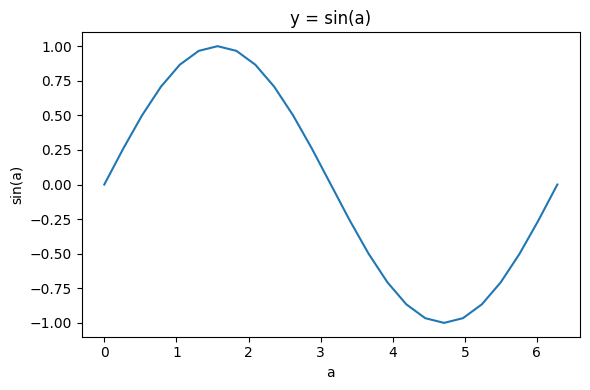

In [58]:
b = torch.sin(a)
plt.figure(figsize=(6,4))
plt.plot(a.detach(), b.detach())
plt.xlabel("a")
plt.ylabel("sin(a)")
plt.title("y = sin(a)")
plt.tight_layout()
plt.show()

In [59]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [60]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [61]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [62]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x0000029F80D9B6A0>, 0), (None, 0))
((<SinBackward0 object at 0x0000029F80D9B6A0>, 0), (None, 0))
((<AccumulateGrad object at 0x0000029F80CC7D30>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


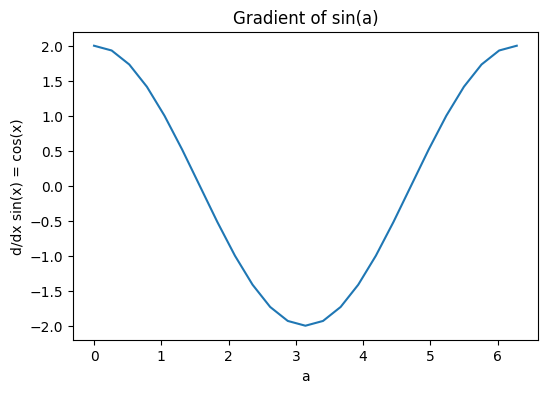

In [63]:
out.backward()
print(a.grad)

plt.figure(figsize=(6,4))
plt.plot(a.detach().cpu().numpy(), a.grad.detach().cpu().numpy())
plt.xlabel("a")
plt.ylabel("d/dx sin(x) = cos(x)")
plt.title("Gradient of sin(a)")
plt.show()

## Autograd in Training

In [64]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [65]:
print(model.layer2.weight[0][0:10]) 
print(model.layer2.weight.grad)

tensor([ 0.0337,  0.0527, -0.0692,  0.0484, -0.0312, -0.0139,  0.0279,  0.0520,
        -0.0565, -0.0513], grad_fn=<SliceBackward0>)
None


In [66]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(224.1449, grad_fn=<SumBackward0>)


In [67]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0337,  0.0527, -0.0692,  0.0484, -0.0312, -0.0139,  0.0279,  0.0520,
        -0.0565, -0.0513], grad_fn=<SliceBackward0>)
tensor([8.0283, 5.8116, 2.1093, 4.0634, 5.2377, 2.7517, 2.9944, 3.2950, 1.9803,
        4.0382])


In [68]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0256,  0.0469, -0.0713,  0.0443, -0.0365, -0.0167,  0.0249,  0.0487,
        -0.0584, -0.0553], grad_fn=<SliceBackward0>)
tensor([8.0283, 5.8116, 2.1093, 4.0634, 5.2377, 2.7517, 2.9944, 3.2950, 1.9803,
        4.0382])


In [69]:
print(model.layer2.weight.grad[0][0:10])

for i in range(5):
    optimizer.zero_grad()             
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()                   
    print(model.layer2.weight.grad[0][:10])
    optimizer.step()     

tensor([8.0283, 5.8116, 2.1093, 4.0634, 5.2377, 2.7517, 2.9944, 3.2950, 1.9803,
        4.0382])
tensor([4.4019, 2.6289, 5.5573, 2.4479, 4.5160, 1.2651, 1.0179, 1.9942, 0.7899,
        5.0370])
tensor([3.4040, 1.6371, 7.0548, 1.7843, 4.0896, 1.1895, 0.9557, 1.4447, 0.5286,
        5.0134])
tensor([2.3279, 1.1792, 6.9995, 0.9148, 3.2581, 1.2350, 0.9605, 1.1435, 0.3476,
        3.9402])
tensor([1.3715, 0.8519, 5.9297, 0.0870, 2.2953, 1.2251, 0.8314, 0.8560, 0.2349,
        2.3799])
tensor([ 0.7849,  0.5636,  4.7419, -0.4033,  1.5667,  1.0732,  0.6340,  0.6707,
         0.1582,  1.1686])


In [70]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [71]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [72]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [73]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.6002, 0.6560, 0.4235, 0.3835, 0.8620], requires_grad=True)
tensor([0.6002, 0.6560, 0.4235, 0.3835, 0.8620])


In [74]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [75]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

C:\Users\prate\AppData\Local\Temp\ipykernel_11044\2096076201.py:11: FutureWarning: The attribute `use_cuda` will be deprecated soon, please use ``use_device = 'cuda'`` instead.
  with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:


-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        51.00%       2.535ms        51.00%       2.535ms       2.535us      13.057ms        53.90%      13.057ms      13.057us          1000  
    aten::mul        49.00%       2.436ms        49.00%       2.436ms       2.436us      11.169ms        46.10%      11.169ms      11.169us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 4.971ms
Self CUDA time total: 24.226ms



In [76]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1145.5773,  613.9099,  465.1081], grad_fn=<MulBackward0>)


In [77]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [78]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) 
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.9575]), tensor([0.3581]))


(tensor([[5.2104]]), tensor([[3.]]))

In [79]:
inputs = (torch.rand(3), torch.rand(3))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2855, 0.8019, 0.7826]), tensor([0.6296, 0.0613, 0.3565]))


(tensor([[2.6609, 0.0000, 0.0000],
         [0.0000, 4.4594, 0.0000],
         [0.0000, 0.0000, 4.3744]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

In [80]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([-1027.4192,  -632.3323,  -881.0031]),
 tensor([5.1200e+01, 5.1200e+02, 5.1200e-02]))

## Building Models in PyTorch

In [81]:
import torch

class TinyModel(torch.nn.Module):
    
    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
Parameter containing:
tensor([[-0.0078, -0.0632, -0.0375,  ..., -0.0810, -0.0095, -0.0121],
        [-0.0832,  0.0937,  0.0945,  ..., -0.0897, -0.0819,  0.0497],
        [ 0.0268, -0.0244,  0.0997,  ...,  0.0250,  0.0260,  0.0929],
        ...,
        [-0.0483, -0.0722, -0.0997,  ..., -0.0446, -0.0404, -0.0264],
        [-0.0367,  0.0069, -0.0428,  ..., -0.0437,  0.0256, -0.0275],
        [ 0.0921, -0.0459,  0.0709,  ...,  0.0488, -0.0067, -0.0428]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0489,  0.0444,  0.0900,  0.0620,  0.0518,  0.0936,  0.0831, -0.0188,
         0.0487,  0.0976, -0.0658, -0.0008,  0.0974,  0.0943,  0.0274,  0.0654,
        -0.0064, -0.0286, -0.0274, -0.09

In [82]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.7896, 0.1310, 0.6721]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.3551,  0.2135,  0.1391],
        [ 0.4495, -0.1167, -0.4971]], requires_grad=True)
Parameter containing:
tensor([0.2070, 0.5519], requires_grad=True)


Output:
tensor([[0.6088, 0.5574]], grad_fn=<AddmmBackward0>)


In [83]:
import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120) 
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [84]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [85]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.1847, 0.5465, 0.4129, 0.7210, 0.7140, 0.5548],
         [0.6181, 0.5909, 0.7307, 0.3257, 0.0643, 0.4201],
         [0.7515, 0.9315, 0.5707, 0.2225, 0.0919, 0.5892],
         [0.4374, 0.4969, 0.8219, 0.4541, 0.1397, 0.6570],
         [0.4150, 0.7315, 0.6121, 0.5593, 0.4039, 0.5276],
         [0.3211, 0.3742, 0.9262, 0.5564, 0.6771, 0.0512]]])
tensor([[[0.9315, 0.7210],
         [0.9262, 0.6771]]])


In [86]:
my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[10.3449, 10.6849, 24.5803, 24.7140],
         [ 7.2084, 11.1204, 18.7987, 12.2554],
         [15.1826, 23.2376, 10.7599, 20.3168],
         [20.2091,  8.0372, 16.8696, 12.3993]]])
tensor(15.4199)
tensor([[[-1.0239, -0.9758,  0.9904,  1.0093],
         [-1.2321, -0.2939,  1.5476, -0.0217],
         [-0.4580,  1.2253, -1.3823,  0.6149],
         [ 1.2698, -1.3811,  0.5425, -0.4311]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(2.2352e-08, grad_fn=<MeanBackward0>)


In [87]:
my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[0.0000, 0.4472, 0.9486, 0.0000],
         [0.5039, 0.0000, 1.1472, 0.0000],
         [0.2569, 1.4124, 1.3139, 0.0000],
         [0.1093, 0.3800, 0.0000, 0.0000]]])
tensor([[[0.5261, 0.4472, 0.9486, 0.0000],
         [0.0000, 0.0000, 1.1472, 1.2769],
         [0.2569, 0.0000, 1.3139, 1.3305],
         [0.1093, 0.3800, 1.0285, 0.0000]]])


## Using TensorBoard with PyTorch

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.tensorboard import SummaryWriter

In [90]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

100.0%
100.0%
100.0%
100.0%


In [91]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5  
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

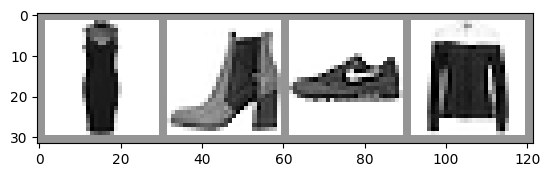

In [92]:
dataiter = iter(training_loader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
plt.show()

In [93]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

In [94]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [95]:
print(len(validation_loader))
for epoch in range(1): 
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:
            print('Batch {}'.format(i + 1))
            running_vloss = 0.0
            
            net.train(False)
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) 
            
            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)
            
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


In [96]:
dataiter = iter(training_loader)
images, labels = next(dataiter)

writer.add_graph(net, images)
writer.flush()

In [97]:
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

images, labels = select_n_random(training_set.data, training_set.targets)

class_labels = [classes[label] for label in labels]

features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

## Training Model in PyTorch

In [98]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


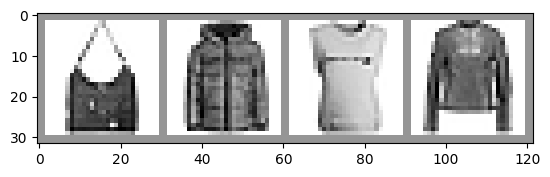

Bag  Coat  Pullover  Coat


In [99]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5 
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
plt.show()
print('  '.join(classes[labels[j]] for j in range(4)))

In [100]:
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

model = GarmentClassifier()

In [101]:
loss_fn = torch.nn.CrossEntropyLoss()

dummy_outputs = torch.rand(4, 10)
dummy_labels = torch.tensor([1, 5, 3, 7])
    
print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.4603, 0.0365, 0.2930, 0.7460, 0.1451, 0.1685, 0.1277, 0.9897, 0.1907,
         0.1202],
        [0.7470, 0.0964, 0.4640, 0.5266, 0.3425, 0.4068, 0.4625, 0.6264, 0.1430,
         0.3263],
        [0.8322, 0.9821, 0.4717, 0.5749, 0.5773, 0.8765, 0.3722, 0.1269, 0.3590,
         0.8400],
        [0.1234, 0.8145, 0.5517, 0.8281, 0.5592, 0.1622, 0.3554, 0.5538, 0.2697,
         0.6786]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.3999783992767334


In [102]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [103]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.
    
    for i, data in enumerate(training_loader):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.
            
    return last_loss

In [104]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

In [105]:
EPOCHS = 7

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)
    
    model.train(False)
    
    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss
    
    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()
    
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)
    
    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 1.588047708287835
  batch 2000 loss: 0.8033186459727585
  batch 3000 loss: 0.6979934040135704
  batch 4000 loss: 0.6251191600980237
  batch 5000 loss: 0.5782242239636834
  batch 6000 loss: 0.5528479257351718
  batch 7000 loss: 0.5410434090851922
  batch 8000 loss: 0.4901446260828525
  batch 9000 loss: 0.48620527154766024
  batch 10000 loss: 0.49739245413499883
  batch 11000 loss: 0.47315494799107544
  batch 12000 loss: 0.4459049387665
  batch 13000 loss: 0.45969943070213776
  batch 14000 loss: 0.41818246561149136
  batch 15000 loss: 0.4358621772226761
LOSS train 0.4358621772226761 valid 0.4275261163711548
EPOCH 2:
  batch 1000 loss: 0.41336643215845104
  batch 2000 loss: 0.3992057218850532
  batch 3000 loss: 0.4077621448031277
  batch 4000 loss: 0.3864536953278002
  batch 5000 loss: 0.3901701804336626
  batch 6000 loss: 0.38393966840291976
  batch 7000 loss: 0.3695093432153808
  batch 8000 loss: 0.365920573643074
  batch 9000 loss: 0.37190652085641707
  batc

# References:
https://docs.pytorch.org/tutorials/beginner/introyt/introyt_index.html